# US Housing Market Analysis

In [409]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [410]:
# Read in data
file_path = Path("data/housing_data3.csv")
df = pd.read_csv(file_path)
df.head()

,Date,Price Index,Monthly Supply,Permits,Sentiment Index,Consumer Price Index,Effective Federal Funds Rate
0,1987-01-01,63.734,6.0,1690.0,90.4,111.2,6.43
1,1987-02-01,64.134,6.2,1689.0,90.2,111.6,6.10
2,1987-03-01,64.469,6.0,1704.0,90.8,112.1,6.13
3,1987-04-01,64.973,6.0,1601.0,92.8,112.7,6.37
4,1987-05-01,65.547,6.7,1500.0,91.1,113.1,6.85


In [411]:
df.tail()

,Date,Price Index,Monthly Supply,Permits,Sentiment Index,Consumer Price Index,Effective Federal Funds Rate
430,2022-11-01,296.809,9.4,1402.0,56.8,297.71,3.78
431,2022-12-01,294.266,8.5,1409.0,59.7,296.80,4.10
432,2023-01-01,292.444,8.1,1354.0,64.9,299.17,4.33
433,2023-02-01,293.390,8.3,1482.0,67.0,300.84,4.57
434,2023-03-01,297.077,7.9,1437.0,62.0,301.84,4.65


In [412]:
# create a new column called 'PRICE_CHANGE_UP_DOWN' and set the values to 0 if the value of the 'CSUSHPISA' column is less than the value of the previous row, otherwise set the value to 1
df["Price Change"] = np.where(df["Price Index"] < df["Price Index"].shift(1), 0, 1)
df.tail(10)

,Date,Price Index,Monthly Supply,Permits,Sentiment Index,Consumer Price Index,Effective Federal Funds Rate,Price Change
425,2022-06-01,308.334,9.5,1701.0,50.0,296.31,1.21,1
426,2022-07-01,307.135,10.1,1658.0,51.5,296.28,1.68,0
427,2022-08-01,303.649,8.7,1586.0,58.2,296.17,2.33,0
428,2022-09-01,300.451,9.7,1588.0,58.6,296.81,2.56,0
429,2022-10-01,298.672,9.7,1555.0,59.9,298.01,3.08,0
430,2022-11-01,296.809,9.4,1402.0,56.8,297.71,3.78,0
431,2022-12-01,294.266,8.5,1409.0,59.7,296.80,4.10,0
432,2023-01-01,292.444,8.1,1354.0,64.9,299.17,4.33,0
433,2023-02-01,293.390,8.3,1482.0,67.0,300.84,4.57,1
434,2023-03-01,297.077,7.9,1437.0,62.0,301.84,4.65,1


In [413]:
# get the value counts for the PRICE_CHANGE_UP_DOWN column
df["Price Change"].value_counts()

1    319
0    116
Name: Price Change, dtype: int64

# Defining the feature and target variables

In [414]:
# Define features set
X = df.copy()
X = X.drop("Date", axis=1)
X = X.drop("Price Index", axis=1)
X = X.drop("Price Change", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,Monthly Supply,Permits,Sentiment Index,Consumer Price Index,Effective Federal Funds Rate
1,6.2,1689.0,90.2,111.6,6.10
2,6.0,1704.0,90.8,112.1,6.13
3,6.0,1601.0,92.8,112.7,6.37
4,6.7,1500.0,91.1,113.1,6.85
5,6.9,1522.0,91.5,113.5,6.73


In [415]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(434, 5)
Monthly Supply                  0
Permits                         0
Sentiment Index                 0
Consumer Price Index            0
Effective Federal Funds Rate    0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [416]:
# Define target vector 'PRICE_CHANGE_UP_DOWN' as y
y = df["Price Change"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Splitting the data into training and testing sets

In [417]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [418]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [419]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [420]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(109, 5)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [421]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [422]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [423]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 1 1 0 0 1 0 1 1 0]
First 10 Actual labels: [[1], [1], [0], [0], [0], [1], [1], [1], [1], [0]]


# Evaluating the Random Forest model

In [424]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,-1.0,-inf
3,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,NaN
5,1.0,1.0,0.0,0.0
6,0.0,1.0,1.0,100.0
7,1.0,1.0,0.0,0.0
8,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,NaN


In [425]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.009174311926605505


In [426]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1559633027522936


In [427]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.39492189449597953


In [428]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: inf


In [429]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.8440366972477065


# Feature importance

In [430]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

Monthly Supply: (0.22847498000073)
Permits: (0.20689706834966184)
Sentiment Index: (0.21567229248367703)
Consumer Price Index: (0.20710662979424302)
Effective Federal Funds Rate: (0.141849029371688)


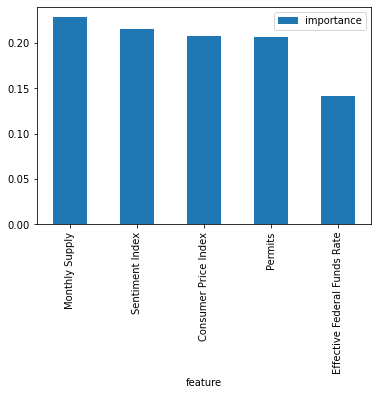

In [431]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
# save the graph
plt.savefig("images/feature_importance3.png")
plt.show()

In [432]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# display the confusion matrix
display(cm_df)


,Predicted 0,Predicted 1
Actual 0,19,8
Actual 1,9,73
